In [41]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
%matplotlib widget

In [42]:
# nominal sweep range (ns)	measured sweep range(ns)	A1	A2	A3	A4
# 0.5	0.446	4.557E-01	-4.600E-05	-2.139E-08	4.141E-11
# 1	1.19	1.270E+00	-3.080E-04	6.340E-08	1.188E-10
# 2	1.74	1.873E+00	-5.849E-04	8.680E-07	-6.720E-10
# 5	5.21	5.362E+00	-4.228E-04	1.340E-06	-1.975E-09
# 10	9.29	8.155E+00	7.478E-03	-1.295E-05	6.002E-09
# 20	20.3	1.942E+01	-1.554E-03	-5.353E-07	5.108E-09
# 50	50.8	5.378E+01	-1.556E-02	1.410E-05	-4.310E-09
# 100	99	9.245E+01	1.927E-03	1.935E-05	-1.146E-08

In [148]:
# Polynomial coefficients provided (example for 1 ns sweep; modify as needed)
V1_coefficients = {
    "0.5": [4.557E-01, -4.600E-05, -2.139E-08, 4.141E-11],
    "1": [1.270E+00, -3.080E-04, 6.340E-08, 1.188E-10],
    "2": [1.873E+00, -5.849E-04, 8.680E-07, -6.720E-10],
    "5": [5.362E+00, -4.228E-04, 1.340E-06, -1.975E-09],
    "10": [8.155E+00, 7.478E-03, -1.295E-05, 6.002E-09],
    "20": [1.942E+01, -1.554E-03, -5.353E-07, 5.108E-09],
    "50": [5.378E+01, -1.556E-02, 1.410E-05, -4.310E-09],
    "100": [9.245E+01, 1.927E-03, 1.935E-05, -1.146E-08]
}

V2_coefficients = {
    "0.5":  [5.403E-01, -7.711E-05,  9.203E-08, -4.249E-11],
    "1":    [1.168E+00, -5.748E-04,  4.431E-07, -7.181E-11],
    "2":    [1.849E+00, -5.649E-04,  2.224E-07,  3.929E-11],
    "5":    [5.091E+00, -2.573E-03,  1.539E-06,  3.944E-10],
    "10":   [1.049E+01,  4.595E-04, -5.702E-06,  3.759E-09],
    "20":   [1.931E+01,  4.944E-03, -8.345E-06,  6.633E-09],
    "50":   [4.920E+01, -8.952E-03,  7.652E-06, -1.327E-09],
    "100":  [9.625E+01, -3.544E-03,  1.598E-05, -8.939E-09]
}

In [149]:
# Incremental time per pixel (beamline provided nested polynomial)
def pixel_to_increment(pixel, coeffs):
    A1, A2, A3, A4 = coeffs
    return A1 + pixel * (A2 + pixel * (A3 + pixel * A4))

# Cumulative sum to get absolute time axis
def pixel_to_time_axis(num_pixels, coeffs):
    increments = pixel_to_increment(np.arange(num_pixels), coeffs)
    absolute_time = np.cumsum(increments)
    return absolute_time

In [150]:

#### Kohei data path - the .tiffs for the XRD and VISAR are created here /work/kmiyanishi/userdata/2025b/fitzgerald2025b and then either 
    # original_files or renamed_files - not sure which yet! (Mila 28/11/25 14:30)

experiment_path = "/work/kmiyanishi/userdata/2025b/fitzgerald2025b/original_files/"
# experiment_path = "/work/kmiyanishi/userdata/2025b/fitzgerald2025b/renamed_files/"

print(f"Path exists: {os.path.exists(experiment_path)}")

# two VISAR pathways visar1 & visar2, not sure which one the .tiffs will appear in 
# visar1_folderpath = os.path.join(experiment_path, 'visar1')
# visar2_folderpath = os.path.join(experiment_path, 'visar2')

visar1_folderpath_cal = os.path.join(experiment_path, 'visar1_org/v1_prep_fitzgerald2025b')
visar2_folderpath_cal = os.path.join(experiment_path, 'visar2_org/v2_prep_fitzgerald2025b')


Path exists: True


Sweep window 20: t0 pixel visar1 102
Sweep window 20: t0 pixel visar1 = 112


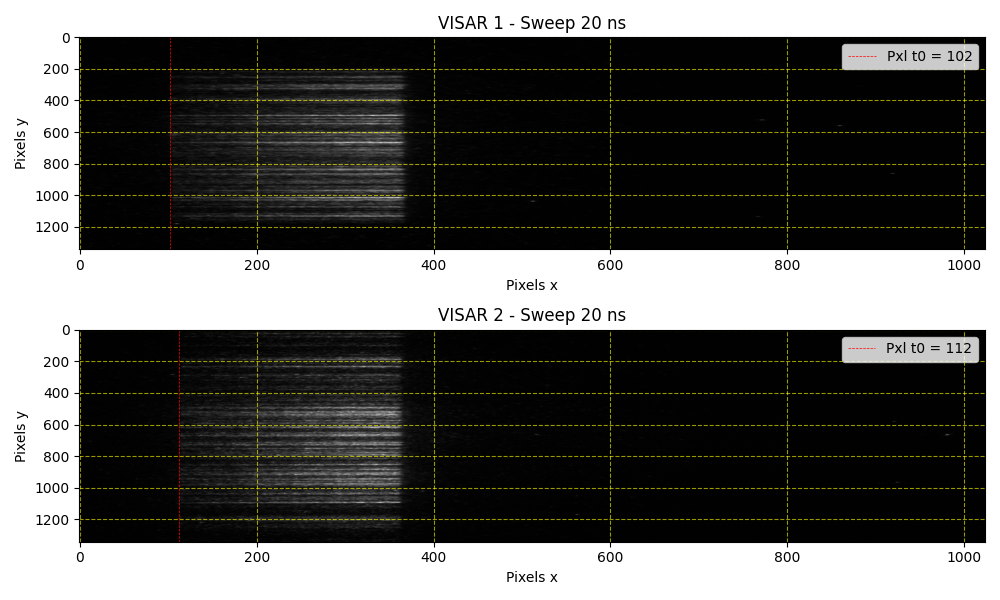

In [157]:
# Calibration for different time windows

# Plotting
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))

# Set your sweep range here
selected_sweep = "20"

# Open the images
image_pathV1 = os.path.join(visar1_folderpath_cal, f"v1_sync{selected_sweep}ns.tif")
image_V1 = Image.open(image_pathV1)
image_arrayV1 = np.array(image_V1)

image_arrayV1 = np.rot90(np.flip(image_arrayV1, (0,1)),3)  

ax[0].imshow(image_arrayV1, cmap='gray', aspect='auto')
ax[0].set_xlabel("Pixels x")
ax[0].set_ylabel("Pixels y")
ax[0].set_title(f"VISAR 1 - Sweep {selected_sweep} ns")

ny, nx = image_arrayV1.shape
pixels = np.arange(nx)
V1_t0_20ns = int(pixels[-1]*0.1)

ax[0].axvline(x = V1_t0, color='red', linestyle='--', linewidth=0.5, label=f'Pxl t0 = {V1_t0}')
print(f'Sweep window {selected_sweep}: t0 pixel visar1 {V1_t0}')

# Add grid
ax[0].grid(True, color='yellow', linestyle='--', alpha=0.6)
ax[0].legend()

image_pathV2 = os.path.join(visar2_folderpath_cal, f"v2__sync{selected_sweep}ns.tif")
image_V2 = Image.open(image_pathV2)
image_arrayV2 = np.array(image_V2)

image_arrayV2 = np.rot90(np.flip(image_arrayV2, (0,1)),3) 

ny, nx = image_arrayV2.shape
pixels = np.arange(nx)
V2_t0_20ns = int(pixels[-1]*0.11)

ax[1].axvline(x = V2_t0, color='red', linestyle='--', linewidth=0.5, label=f'Pxl t0 = {V2_t0}')
print(f'Sweep window {selected_sweep}: t0 pixel visar1 = {V2_t0}')

ax[1].imshow(image_arrayV2, cmap='gray', aspect='auto')
ax[1].set_xlabel("Pixels x")
ax[1].set_ylabel("Pixels y")
ax[1].set_title(f"VISAR 2 - Sweep {selected_sweep} ns")

# Add grid
ax[1].grid(True, color='yellow', linestyle='--', alpha=0.6)
ax[1].legend()

plt.tight_layout()
plt.show()

20282.156674295802
time -1953.364296197208 - 18309.372378098593
total extent 20262.7366742958
time -2170.542336885249 - 19010.423956636172
total extent 21180.966293521422


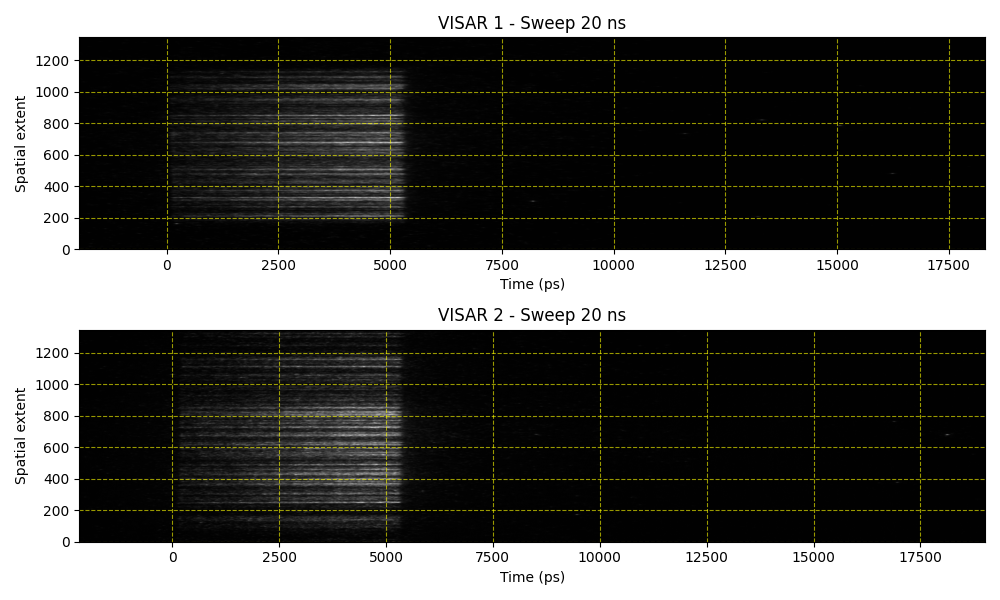

In [158]:
# Calibration for different time windows

# Plotting
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))

# Set your sweep range here
selected_sweep = "20"
poly_coeffs_V1 = V1_coefficients[selected_sweep]

# Open the images
image_pathV1 = os.path.join(visar1_folderpath_cal, f"v1_sync{selected_sweep}ns.tif")
image_V1 = Image.open(image_pathV1)
image_arrayV1 = np.array(image_V1)

image_arrayV1 = np.rot90(np.flip(image_arrayV1, (0,1)),3)  
ny, nx = image_arrayV1.shape
time_ns = pixel_to_time_axis(nx, poly_coeffs_V1)

t0_time_ns = pixel_to_time_axis(V1_t0_20ns, poly_coeffs_V1)[-1]  

print(time_ns[-1])

time_ns_shifted = time_ns - t0_time_ns
extent = [time_ns_shifted[0], time_ns_shifted[-1], 0, ny]

print(f'time {time_ns_shifted[0]} - {time_ns_shifted[-1]}')
print(f'total extent {time_ns_shifted[-1] - time_ns_shifted[0]}')


ax[0].imshow(image_arrayV1, cmap='gray', aspect='auto', extent=extent)

# print(f't0 pixel visar1 {int(time_ns[-1]*0.1)}')

ax[0].set_xlabel("Time (ps)")
ax[0].set_ylabel("Spatial extent")
ax[0].set_title(f"VISAR 1 - Sweep {selected_sweep} ns")

# Add grid
ax[0].grid(True, color='yellow', linestyle='--', alpha=0.6)
# ax[0].legend()

image_pathV2 = os.path.join(visar2_folderpath_cal, f"v2__sync{selected_sweep}ns.tif")
image_V2 = Image.open(image_pathV2)
image_arrayV2 = np.array(image_V2)

image_arrayV2 = np.rot90(np.flip(image_arrayV2, (0,1)),3)  

ny, nx = image_arrayV2.shape

poly_coeffs_V2 = V2_coefficients[selected_sweep]

time_ns = pixel_to_time_axis(nx, poly_coeffs_V2)
t0_time_ns = pixel_to_time_axis(V2_t0_20ns, poly_coeffs_V2)[-1]  

time_ns_shifted = time_ns - t0_time_ns
extent = [time_ns_shifted[0], time_ns_shifted[-1], 0, ny]

print(f'time {time_ns_shifted[0]} - {time_ns_shifted[-1]}')
print(f'total extent {time_ns_shifted[-1] - time_ns_shifted[0]}')

ax[1].imshow(image_arrayV2, cmap='gray', aspect='auto', extent=extent)

# print(f't0 pixel visar2 {int(time_ns[-1]*0.1)}')

ax[1].set_xlabel("Time (ps)")
ax[1].set_ylabel("Spatial extent")
ax[1].set_title(f"VISAR 2 - Sweep {selected_sweep} ns")

# Add grid
ax[1].grid(True, color='yellow', linestyle='--', alpha=0.6)

# ax[1].legend()
plt.tight_layout()
plt.show()

(1344, 1024)
(1344, 1024)


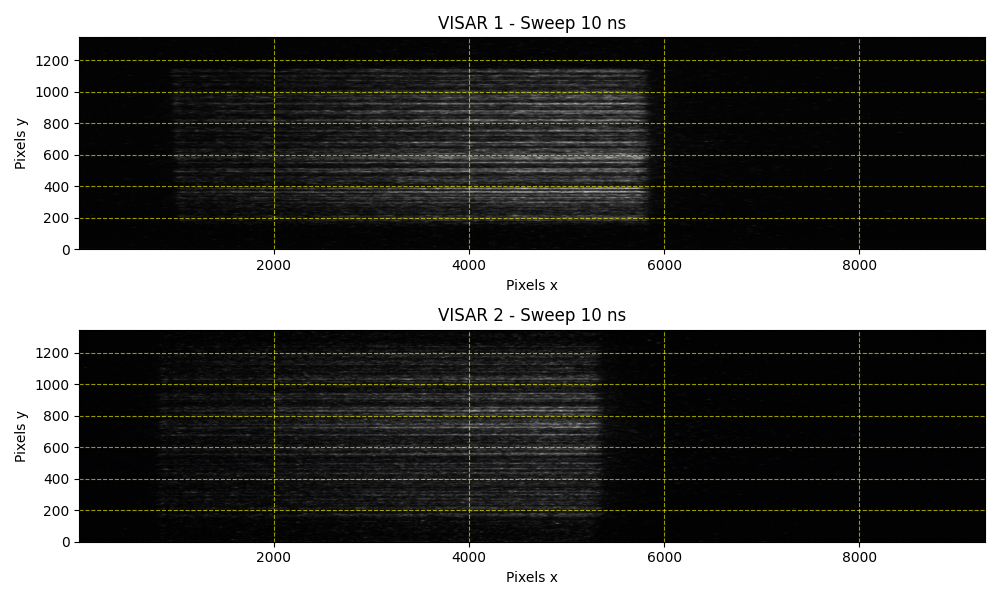

In [95]:
# Calibration for different time windows

# Plotting
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))

# Set your sweep range here
selected_sweep = "10"
poly_coeffs = coefficients[selected_sweep]

# Open the images
image_pathV1 = os.path.join(visar1_folderpath_cal, f"v1_sync{selected_sweep}ns.tif")
image_V1 = Image.open(image_pathV1)
image_arrayV1 = np.array(image_V1)

image_arrayV1 = np.rot90(np.flip(image_arrayV1, (0,1)),3)  

ny, nx = image_arrayV1.shape

time_ns = pixel_to_time_axis(nx, poly_coeffs)

print(image_arrayV1.shape)
extent = [time_ns[0], time_ns[-1], 0, ny]

ax[0].imshow(image_arrayV1, cmap='gray', aspect='auto', extent=extent)
ax[0].set_xlabel("Pixels x")
ax[0].set_ylabel("Pixels y")
ax[0].set_title(f"VISAR 1 - Sweep {selected_sweep} ns")

# Add grid
ax[0].grid(True, color='yellow', linestyle='--', alpha=0.6)

image_pathV2 = os.path.join(visar2_folderpath_cal, f"v2__sync{selected_sweep}ns.tif")
image_V2 = Image.open(image_pathV2)
image_arrayV2 = np.array(image_V2)

image_arrayV2 = np.rot90(np.flip(image_arrayV2, (0,1)),3)  

ny, nx = image_arrayV2.shape

time_ns = pixel_to_time_axis(nx, poly_coeffs)

print(image_arrayV2.shape)
extent = [time_ns[0], time_ns[-1], 0, ny]

ax[1].imshow(image_arrayV2, cmap='gray', aspect='auto', extent=extent)
ax[1].set_xlabel("Pixels x")
ax[1].set_ylabel("Pixels y")
ax[1].set_title(f"VISAR 2 - Sweep {selected_sweep} ns")

# Add grid
ax[1].grid(True, color='yellow', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

(1344, 1024)
(1344, 1024)


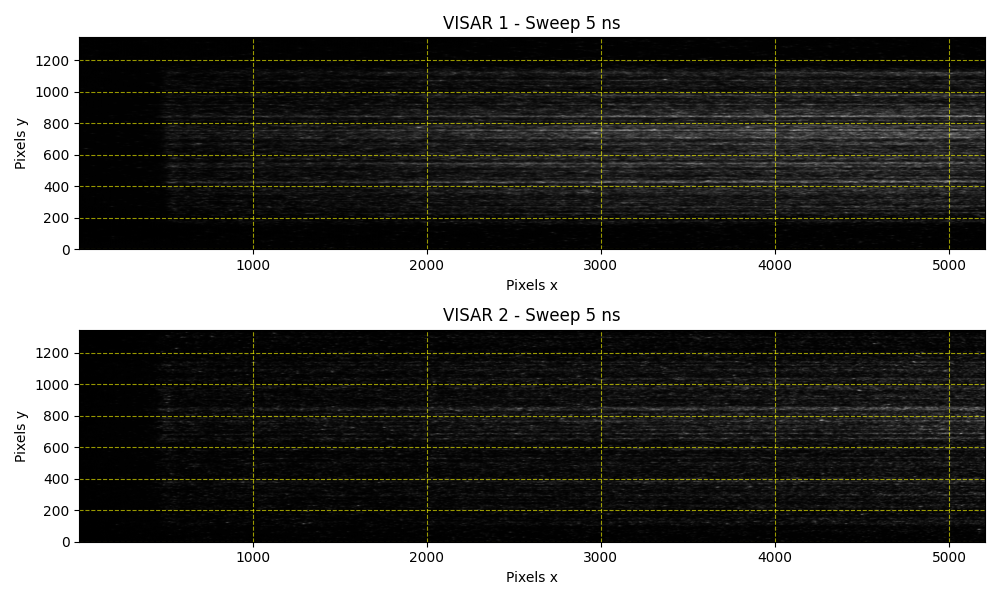

In [97]:
# Calibration for different time windows

# Plotting
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))

# Set your sweep range here
selected_sweep = "5"
poly_coeffs = coefficients[selected_sweep]

# Open the images
image_pathV1 = os.path.join(visar1_folderpath_cal, f"v1_sync{selected_sweep}ns.tif")
image_V1 = Image.open(image_pathV1)
image_arrayV1 = np.array(image_V1)

image_arrayV1 = np.rot90(np.flip(image_arrayV1, (0,1)),3)  

ny, nx = image_arrayV1.shape

time_ns = pixel_to_time_axis(nx, poly_coeffs)

print(image_arrayV1.shape)
extent = [time_ns[0], time_ns[-1], 0, ny]

ax[0].imshow(image_arrayV1, cmap='gray', aspect='auto', extent=extent)
ax[0].set_xlabel("Pixels x")
ax[0].set_ylabel("Pixels y")
ax[0].set_title(f"VISAR 1 - Sweep {selected_sweep} ns")

# Add grid
ax[0].grid(True, color='yellow', linestyle='--', alpha=0.6)

image_pathV2 = os.path.join(visar2_folderpath_cal, f"v2_sync{selected_sweep}ns.tif")
image_V2 = Image.open(image_pathV2)
image_arrayV2 = np.array(image_V2)

image_arrayV2 = np.rot90(np.flip(image_arrayV2, (0,1)),3)  

ny, nx = image_arrayV2.shape

time_ns = pixel_to_time_axis(nx, poly_coeffs)

print(image_arrayV2.shape)
extent = [time_ns[0], time_ns[-1], 0, ny]

ax[1].imshow(image_arrayV2, cmap='gray', aspect='auto', extent=extent)
ax[1].set_xlabel("Pixels x")
ax[1].set_ylabel("Pixels y")
ax[1].set_title(f"VISAR 2 - Sweep {selected_sweep} ns")

# Add grid
ax[1].grid(True, color='yellow', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()